In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_excel('credit-data-training.xlsx', sheet_name="Sheet1")
train

,Credit-Application-Result,Account-Balance,Duration-of-Credit-Month,Payment-Status-of-Previous-Credit,Purpose,Credit-Amount,Value-Savings-Stocks,Length-of-current-employment,Instalment-per-cent,Guarantors,Duration-in-Current-address,Most-valuable-available-asset,Age-years,Concurrent-Credits,Type-of-apartment,No-of-Credits-at-this-Bank,Occupation,No-of-dependents,Telephone,Foreign-Worker
0,Creditworthy,Some Balance,4,Paid Up,Other,1494,£100-£1000,< 1yr,1,None,2.0,1,NaN,Other Banks/Depts,2,1,1,2,1,2
1,Creditworthy,Some Balance,4,Paid Up,Home Related,1494,£100-£1000,< 1yr,1,None,2.0,1,29.0,Other Banks/Depts,2,1,1,2,1,2
2,Creditworthy,Some Balance,4,No Problems (in this bank),Home Related,1544,None,1-4 yrs,2,None,1.0,1,42.0,Other Banks/Depts,2,More than 1,1,2,1,1
3,Creditworthy,Some Balance,4,No Problems (in this bank),Home Related,3380,None,1-4 yrs,1,None,1.0,1,37.0,Other Banks/Depts,2,1,1,2,1,1
4,Creditworthy,No Account,6,Paid Up,Home Related,343,None,< 1yr,4,None,1.0,1,27.0,Other Banks/Depts,2,1,1,1,1,1
5,Creditworthy,Some Balance,6,No Problems (in this bank),Home Related,362,< £100,< 1yr,4,None,NaN,3,52.0,Other Banks/Depts,2,More than 1,1,1,1,1
6,Non-Creditworthy,No Account,6,Some Problems,Home Related,433,£100-£1000,< 1yr,4,None,NaN,2,24.0,Other Banks/Depts,1,1,1,2,1,1
7,Creditworthy,No Account,6,Paid Up,Home Related,454,None,< 1yr,3,None,NaN,2,22.0,Other Banks/Depts,2,1,1,1,1,1
8,Creditworthy,No Account,6,Paid Up,Home Related,484,None,1-4 yrs,3,Yes,3.0,1,28.0,Other Banks/Depts,2,1,1,1,1,1
9,Creditworthy,Some Balance,6,Paid Up,Home Related,660,£100-£1000,1-4 yrs,2,None,4.0,1,23.0,Other Banks/Depts,1,1,1,1,1,1


Após a importação do arquivo, temos alguns dados faltantes conforme gráfico abaixo. Porém seguindo o projeto da Nanodegree da Udacity, algumas variáveis foram excluidas do modelo, conforme procedimento na metodologia. Afim de seguir fielmente a metodologia da Nanodegree algumas variáveis foram removidas, e outra (idade), foi tratada utilizando a mediana. 

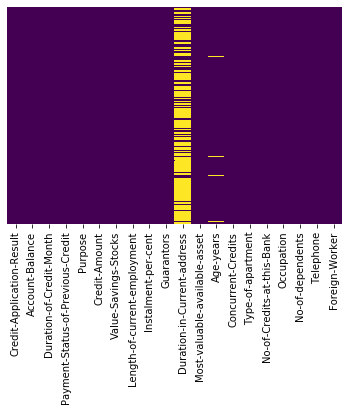

In [3]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Após importamos o arquivo, existem algumas perguntas que precisam ser feitas, no levantamento de hipóteses. Afinal o que queremos responder ou solucionar com esses dados?
- Pelos dados, que tipo de negócio ou ramo de atuação esses dados querem solucionar?
- Quais decisões precisam ser tomadas?
- Esses dados estão balanceados? Caso não estejam, o que será feito para corrigir o problema?
- Quais dados serão excluídos do modelo?
- Qual modelo foi escolhido? Quais foram as decisões que embasaram a escolha?
- Dos novos 500 clientes, quantos tiveram seu pedido de crédito liberado e quantos tiveram seu pedido de crédito negado?

In [4]:
del train['Duration-in-Current-address'] 

In [5]:
train.isnull().sum()

Credit-Application-Result             0
Account-Balance                       0
Duration-of-Credit-Month              0
Payment-Status-of-Previous-Credit     0
Purpose                               0
Credit-Amount                         0
Value-Savings-Stocks                  0
Length-of-current-employment          0
Instalment-per-cent                   0
Guarantors                            0
Most-valuable-available-asset         0
Age-years                            12
Concurrent-Credits                    0
Type-of-apartment                     0
No-of-Credits-at-this-Bank            0
Occupation                            0
No-of-dependents                      0
Telephone                             0
Foreign-Worker                        0
dtype: int64

Nessa área queremos limpar os dados. 

Abaixo valores referente a média, mediana e a moda. 

A média equivale a 35,63 anos. A mediana equivale a 33 anos e a moda equivale a 26,5 anos. 

In [6]:
train['Age-years'].mean()


35.63729508196721

In [7]:
train['Age-years'].median()

33.0

In [8]:
train['Age-years'].mode()

0    26.0
1    27.0
dtype: float64

In [9]:
train.describe()

,Duration-of-Credit-Month,Credit-Amount,Instalment-per-cent,Most-valuable-available-asset,Age-years,Type-of-apartment,Occupation,No-of-dependents,Telephone,Foreign-Worker
count,500.00000,500.000000,500.000000,500.000000,488.000000,500.000000,500.0,500.00000,500.000000,500.000000
mean,21.43400,3199.980000,3.010000,2.360000,35.637295,1.928000,1.0,1.14600,1.400000,1.038000
std,12.30742,2831.386861,1.113724,1.064268,11.501522,0.539814,0.0,0.35346,0.490389,0.191388
min,4.00000,276.000000,1.000000,1.000000,19.000000,1.000000,1.0,1.00000,1.000000,1.000000
25%,12.00000,1357.250000,2.000000,1.000000,27.000000,2.000000,1.0,1.00000,1.000000,1.000000
50%,18.00000,2236.500000,3.000000,3.000000,33.000000,2.000000,1.0,1.00000,1.000000,1.000000
75%,24.00000,3941.500000,4.000000,3.000000,42.000000,2.000000,1.0,1.00000,2.000000,1.000000
max,60.00000,18424.000000,4.000000,4.000000,75.000000,3.000000,1.0,2.00000,2.000000,2.000000


Quanto mais próximo forem os valores da média, mediana e moda, mais distribuido será o conjunto dos dados. Nesse caso como a 
média é superior a mediana, então vamos utilizar a mediana para imputar esses valores vazios por dois motivos:
Idade não tem numeros quebrados, são números inteiros, logo se descarta imputar valores faltantes com a média. E segundo se a média é superior a mediana, então devemos utilizar a mediana, para diminuir a diferença entre as duas. 

In [10]:
train['Age-years'].fillna(train['Age-years'].median(), inplace=True)

In [11]:
#Gosto de usar o info, para saber quais dados terei que transformar em variáveis numéricas para o modelo. 
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 19 columns):
Credit-Application-Result            500 non-null object
Account-Balance                      500 non-null object
Duration-of-Credit-Month             500 non-null int64
Payment-Status-of-Previous-Credit    500 non-null object
Purpose                              500 non-null object
Credit-Amount                        500 non-null int64
Value-Savings-Stocks                 500 non-null object
Length-of-current-employment         500 non-null object
Instalment-per-cent                  500 non-null int64
Guarantors                           500 non-null object
Most-valuable-available-asset        500 non-null int64
Age-years                            500 non-null float64
Concurrent-Credits                   500 non-null object
Type-of-apartment                    500 non-null int64
No-of-Credits-at-this-Bank           500 non-null object
Occupation                           500 non

In [12]:
del train['Guarantors']
del train['Concurrent-Credits']
del train['Occupation']
del train['No-of-dependents']
del train['Telephone']
del train['Foreign-Worker']

In [13]:
train.Purpose = train.Purpose.astype('category')

In [14]:
train['Credit-Application-Result'].value_counts()

Creditworthy        358
Non-Creditworthy    142
Name: Credit-Application-Result, dtype: int64

In [15]:
#Variável Binária
train['Account-Balance'].value_counts()


No Account      262
Some Balance    238
Name: Account-Balance, dtype: int64

In [16]:
train['Payment-Status-of-Previous-Credit'].value_counts()

Paid Up                       260
No Problems (in this bank)    204
Some Problems                  36
Name: Payment-Status-of-Previous-Credit, dtype: int64

In [17]:
train['Purpose'].value_counts()

Home Related    355
Used car         83
New car          47
Other            15
Name: Purpose, dtype: int64

In [18]:
train['Value-Savings-Stocks'].value_counts()

None          298
£100-£1000    154
< £100         48
Name: Value-Savings-Stocks, dtype: int64

In [19]:
train['Length-of-current-employment'].value_counts()

< 1yr      279
4-7 yrs    124
1-4 yrs     97
Name: Length-of-current-employment, dtype: int64

In [20]:
train['No-of-Credits-at-this-Bank'].value_counts()

1              320
More than 1    180
Name: No-of-Credits-at-this-Bank, dtype: int64

Aqui gosto de utilizar o método info para mostrar quais variáveis devo transformar. Nesse caso todos os objetos. 

# Transformação das variáveis categóricas em numéricas

Foi utilizado dois métodos para a transformação. O método get_dummies e o label encoder. Para variáveis binárias foi utilizado o método get_dummies, transformando aquela variável categórica em 0 ou 1. E utilizamos o drop_first para excluir umas das dummies, evitando assim um problema de multi-colonariedade. 
Já para o label encoder, foi utilizado esse método para colunas acima de 3 variáveis ou seja variáveis não binárias.

In [21]:
Account_balance = pd.get_dummies(train['Account-Balance'],drop_first=True)  # drop_first=True > Para evitar a multi-colinaridade
Num_emprestimo = pd.get_dummies(train['No-of-Credits-at-this-Bank'],drop_first=True)
Tempo_trabalho = pd.get_dummies(train['Length-of-current-employment'],drop_first=True)
Proposito = pd.get_dummies(train['Purpose'],drop_first=True)
Resultado = pd.get_dummies(train['Credit-Application-Result'],drop_first=True)

In [22]:
train.drop(['Account-Balance','No-of-Credits-at-this-Bank','Length-of-current-employment','Purpose','Credit-Application-Result',],axis=1,inplace=True)

In [23]:
train = pd.concat([train,Account_balance,Num_emprestimo,Tempo_trabalho,Proposito,Resultado],axis=1)

In [24]:
from sklearn.preprocessing import LabelEncoder


In [25]:
pspc = train['Payment-Status-of-Previous-Credit']
set(pspc)
label_encoder = LabelEncoder()
PSPC = label_encoder.fit_transform(pspc)
PSPC
train['Payment-Status-of-Previous-Credit'] = PSPC

In [26]:
#Poupança
#None=298 100-1000 libras=154 <100=48
vss = train['Value-Savings-Stocks']
set(vss)
label_encoder = LabelEncoder()
VSS = label_encoder.fit_transform(vss)
VSS
train['Value-Savings-Stocks'] = VSS

Depois de rodar os scripts, temos uma base de dados totalmente convertida para variáveis numéricas. Agora sim, vamos iniciar o processo de aprendizagem de máquina, e analisar, quais dos 4 tipos de modelo é o melhor para esse conjunto de dados. 

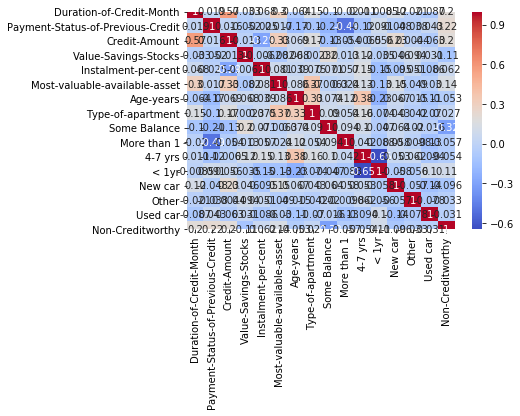

In [27]:
sns.heatmap(train.corr(),cmap='coolwarm',annot=True)
plt.rcParams['figure.figsize'] = (15.5, 10.5)

Conseguimos identificar que não existe nenhuma variavel com alta correlação em "Non-Crefitworthy", que é a nossa variável de classificação que estamos querendo prever. 
Porém existem variáveis que possuem uma correlação média, como é o caso do tempo do empréstimo com o valor do empréstimo. Vamos tirar a prova no gráfico abaixo, referente a essa correlação. 


In [28]:
train['Credito_negado'] =train['Non-Creditworthy']

In [29]:
del train['Non-Creditworthy']

<Figure size 792x504 with 0 Axes>

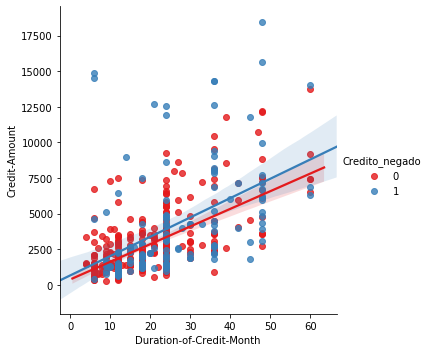

In [30]:
plt.figure(figsize=(11,7))
sns.lmplot(y='Credit-Amount',x='Duration-of-Credit-Month',data=train,hue='Credito_negado',palette='Set1')

Podemos perceber que empréstimos por um prazo e valores mais baixos, na grande grande maioria foram aprovados. Enquanto que empréstimos por um valor e praza=o maiores acabaram sendo muito mais rejeitados do que liberados. 


In [31]:
import statsmodels.api as sm

In [32]:
X = train.drop('Credito_negado',axis=1)
y = train['Credito_negado']

In [33]:
X = sm.add_constant(X)
est = sm.OLS(y, X).fit()

est.summary()

/home/felipe/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Credito_negado   R-squared:                       0.209
Model:                            OLS   Adj. R-squared:                  0.185
Method:                 Least Squares   F-statistic:                     8.531
Date:                Mon, 18 May 2020   Prob (F-statistic):           1.73e-17
Time:                        18:39:01   Log-Likelihood:                -252.61
No. Observations:                 500   AIC:                             537.2
Df Residuals:                     484   BIC:                             604.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -0.0779      0.119     -0.656      0.512      -0.311       0.155
Duration-of-Credit-Month              0.0023      0.002      1.167      0.244      -0.002       0.006
Payment-Status-of-Previous-Credit     0.1450      0.036      4.056      0.000       0.075       0.215
Credit-Amount                      2.576e-05   9.15e-06      2.813      0.005    7.77e-06    4.37e-05
Value-Savings-Stocks                 -0.0262      0.032     -0.826      0.409      -0.088       0.036
Instalment-per-cent                   0.0458      0.019      2.473      0.014       0.009       0.082
Most-valuable-available-asset         0.0333      0.020      1.657      0.098      -0.006       0.073
Age-years                            -0.0007      0.002     -0.383      0.702      -0.004       0.003
Type-of-apartment                    -0.0026      0.039     -0.067      0.946      -0.079       0.074
Some Balance                         -0.2223      0.039     -5.721      0.000      -0.299      -0.146
More than 1                           0.0735      0.044      1.654      0.099      -0.014       0.161
4-7 yrs                               0.0715      0.059      1.207      0.228      -0.045       0.188
< 1yr                                 0.1223      0.049      2.506      0.013       0.026       0.218
New car                              -0.1862      0.066     -2.829      0.005      -0.316      -0.057
Other                                -0.0643      0.109     -0.590      0.555      -0.278       0.150
Used car                             -0.0402      0.051     -0.790      0.430      -0.140       0.060
==============================================================================
Omnibus:                       44.996   Durbin-Watson:                   1.936
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               50.053
Skew:                           0.740   Prob(JB):                     1.35e-11
Kurtosis:                       2.540   Cond. No.                     2.89e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.89e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Training and Predicting Model Logistic

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=48)

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

/home/felipe/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [38]:
logmodel.score(X_train, y_train)

0.7742857142857142

In [39]:
logmodel.score(X_test, y_test)

0.8133333333333334

In [40]:
pred1 = logmodel.predict(X_test)

# Avaliação Modelo Logístico


In [41]:
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report,confusion_matrix

In [42]:
print(classification_report(y_test,pred1))
print('\n')
print(confusion_matrix(y_test,pred1))

              precision    recall  f1-score   support

           0       0.84      0.93      0.88       113
           1       0.68      0.46      0.55        37

    accuracy                           0.81       150
   macro avg       0.76      0.69      0.72       150
weighted avg       0.80      0.81      0.80       150



[[105   8]
 [ 20  17]]


# Training a Decision Tree Model

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=48)

In [44]:
from sklearn.tree import DecisionTreeClassifier

In [45]:
dtree = DecisionTreeClassifier(random_state=48)

In [46]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=48, splitter='best')

# Previsões e avaliação da árvore de decisão

In [47]:
pred3 = dtree.predict(X_test)

In [48]:
from sklearn.metrics import classification_report,confusion_matrix

In [49]:
dtree.score(X_train, y_train)

1.0

In [50]:
dtree.score(X_test, y_test)

0.68

In [51]:
print(classification_report(y_test,pred3))
print('\n')
print(confusion_matrix(y_test,pred3))

              precision    recall  f1-score   support

           0       0.82      0.74      0.78       113
           1       0.38      0.49      0.43        37

    accuracy                           0.68       150
   macro avg       0.60      0.61      0.60       150
weighted avg       0.71      0.68      0.69       150



[[84 29]
 [19 18]]


O modelo está apresentando Overfiting. Pois o modelo generalizou 100 para os dados de treino. Então nesse caso teremos que efetuar uma validação cruzada para reveter esse "problema". 

# Treinando o modelo de florestas aleatórias

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=48)

In [53]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
rfc = RandomForestClassifier(n_estimators=600)

In [55]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=600,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

# Previsões e Avaliação

In [56]:
pred4 = rfc.predict(X_test)

In [57]:
rfc.score(X_train,y_train)

1.0

In [58]:
rfc.score(X_test,y_test)

0.7733333333333333

In [59]:
from sklearn.metrics import classification_report,confusion_matrix

In [60]:
print(classification_report(y_test,pred4))
print('\n')
print(confusion_matrix(y_test,pred4))

              precision    recall  f1-score   support

           0       0.80      0.93      0.86       113
           1       0.58      0.30      0.39        37

    accuracy                           0.77       150
   macro avg       0.69      0.61      0.63       150
weighted avg       0.75      0.77      0.75       150



[[105   8]
 [ 26  11]]


## BOOSTING MODEL

In [61]:
from sklearn.ensemble import GradientBoostingClassifier

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=48)

In [63]:
gbc = GradientBoostingClassifier()

In [64]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [65]:
gbc.score(X_train,y_train)

0.9285714285714286

In [66]:
gbc.score(X_test,y_test)

0.74

**Avaliação do Modelo**

In [67]:
pred2 = gbc.predict(X_test)

In [68]:
print(classification_report(y_test,pred2))
print('\n')
print(confusion_matrix(y_test,pred2))

              precision    recall  f1-score   support

           0       0.80      0.87      0.83       113
           1       0.46      0.35      0.40        37

    accuracy                           0.74       150
   macro avg       0.63      0.61      0.62       150
weighted avg       0.72      0.74      0.73       150



[[98 15]
 [24 13]]


In [69]:
#Modelo Logaritmo
print('Logaritmo')
print(classification_report(y_test,pred1))
print(confusion_matrix(y_test,pred1))
print('\n')

#Arvore de decisão
print('Arvore de decisão')
print(classification_report(y_test,pred3))
print(confusion_matrix(y_test,pred3))
print('\n')

#Floresta aleatória
print('Floresta Aleatória')
print(classification_report(y_test,pred4))
print(confusion_matrix(y_test,pred4))
print('\n')

#Boosting Model
print('Bosting Model')
print(classification_report(y_test,pred2))
print(confusion_matrix(y_test,pred2))
print('\n')


Logaritmo
              precision    recall  f1-score   support

           0       0.84      0.93      0.88       113
           1       0.68      0.46      0.55        37

    accuracy                           0.81       150
   macro avg       0.76      0.69      0.72       150
weighted avg       0.80      0.81      0.80       150

[[105   8]
 [ 20  17]]


Arvore de decisão
              precision    recall  f1-score   support

           0       0.82      0.74      0.78       113
           1       0.38      0.49      0.43        37

    accuracy                           0.68       150
   macro avg       0.60      0.61      0.60       150
weighted avg       0.71      0.68      0.69       150

[[84 29]
 [19 18]]


Floresta Aleatória
              precision    recall  f1-score   support

           0       0.80      0.93      0.86       113
           1       0.58      0.30      0.39        37

    accuracy                           0.77       150
   macro avg       0.69      0.61  

# Testando Novos Parâmetros. 

## Validação Cruzada dos Modelos


In [70]:
dataset = train.drop('Credito_negado', axis=1)
classes = train['Credito_negado']

In [71]:
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score

**Validação Cruzada modelo logístico**

In [72]:
from sklearn.linear_model import LogisticRegressionCV

In [73]:
log_cv = LogisticRegressionCV(random_state=48, cv=10).fit(dataset, classes)


/home/felipe/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/felipe/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/felipe/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/felipe/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/felipe/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of it

In [74]:
logmodel1 = log_cv.predict(dataset)
logmodel1

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [75]:
log_cv.score(dataset, classes)

0.78

In [76]:
print(classification_report(classes, logmodel1))
print('\n')
print(confusion_matrix(classes, logmodel1))

              precision    recall  f1-score   support

           0       0.81      0.91      0.86       358
           1       0.67      0.44      0.53       142

    accuracy                           0.78       500
   macro avg       0.74      0.68      0.69       500
weighted avg       0.77      0.78      0.76       500



[[327  31]
 [ 79  63]]


**Validação Cruzada - Modelo Floresta Aleatória**

In [77]:
random_clf = RandomForestClassifier(random_state=48, n_estimators=100)

In [78]:
resul_random = cross_val_predict(random_clf, dataset, classes, cv=15)

In [79]:
print(classification_report(classes, resul_random))
print('\n')
print(confusion_matrix(classes, resul_random))

              precision    recall  f1-score   support

           0       0.77      0.86      0.81       358
           1       0.50      0.35      0.41       142

    accuracy                           0.72       500
   macro avg       0.63      0.60      0.61       500
weighted avg       0.69      0.72      0.70       500



[[309  49]
 [ 93  49]]


In [80]:
resul_random1 = cross_val_score(random_clf, dataset, classes, cv=15)
resul_random1

array([0.76470588, 0.73529412, 0.70588235, 0.67647059, 0.73529412,
       0.70588235, 0.76470588, 0.84848485, 0.6969697 , 0.78787879,
       0.84848485, 0.66666667, 0.81818182, 0.46875   , 0.5       ])

In [81]:
resul_random1.mean()

0.7149101307189543

**Validação Cruzada - Árvore de Decisão**

In [82]:
tree_clf = DecisionTreeClassifier(random_state=48)

In [83]:
resul_tree = cross_val_predict(tree_clf,dataset, classes, cv=100)

In [84]:
print(classification_report(classes, resul_tree))
print('\n')
print(confusion_matrix(classes, resul_tree))

              precision    recall  f1-score   support

           0       0.77      0.75      0.76       358
           1       0.40      0.42      0.41       142

    accuracy                           0.66       500
   macro avg       0.58      0.59      0.58       500
weighted avg       0.66      0.66      0.66       500



[[268  90]
 [ 82  60]]


In [85]:
score_tree = cross_val_score(tree_clf,dataset, classes, cv=100)
score_tree.mean()


0.6539999999999999

**Validação Cruzada - Boosting**

In [86]:
gbc_clf = GradientBoostingClassifier(random_state=48)

In [87]:
resul_gbc = cross_val_predict(gbc_clf,dataset, classes, cv=100)

In [88]:
print(classification_report(classes, resul_gbc))
print('\n')
print(confusion_matrix(classes, resul_gbc))

              precision    recall  f1-score   support

           0       0.78      0.89      0.83       358
           1       0.58      0.37      0.45       142

    accuracy                           0.74       500
   macro avg       0.68      0.63      0.64       500
weighted avg       0.72      0.74      0.73       500



[[319  39]
 [ 89  53]]


In [89]:
score_gbc = cross_val_score(gbc_clf,dataset, classes, cv=100)
score_gbc.mean()

0.7498333333333332

## Feature Importance

## Árvore de Decisão

In [90]:
dtree.feature_importances_

array([0.        , 0.11907166, 0.04421325, 0.33575879, 0.03090711,
       0.07880581, 0.02058682, 0.12029844, 0.00658771, 0.09461894,
       0.0313905 , 0.01727479, 0.04598183, 0.        , 0.01236858,
       0.04213577])

In [91]:
feature_imp = pd.Series(dtree.feature_importances_,index=X_train.columns).sort_values(ascending=False)
feature_imp

Credit-Amount                        0.335759
Age-years                            0.120298
Duration-of-Credit-Month             0.119072
Some Balance                         0.094619
Instalment-per-cent                  0.078806
< 1yr                                0.045982
Payment-Status-of-Previous-Credit    0.044213
Used car                             0.042136
More than 1                          0.031391
Value-Savings-Stocks                 0.030907
Most-valuable-available-asset        0.020587
4-7 yrs                              0.017275
Other                                0.012369
Type-of-apartment                    0.006588
New car                              0.000000
const                                0.000000
dtype: float64

In [92]:
def visualiza_features_importantes(features_lista):
    %matplotlib inline

    plt.figure(figsize=(16,8))
    sns.barplot(x=features_lista, y=features_lista.index)

    plt.xlabel('Feature Importance Score')
    plt.ylabel('Features')
    plt.title("Visualizing Important Features")
    plt.show()

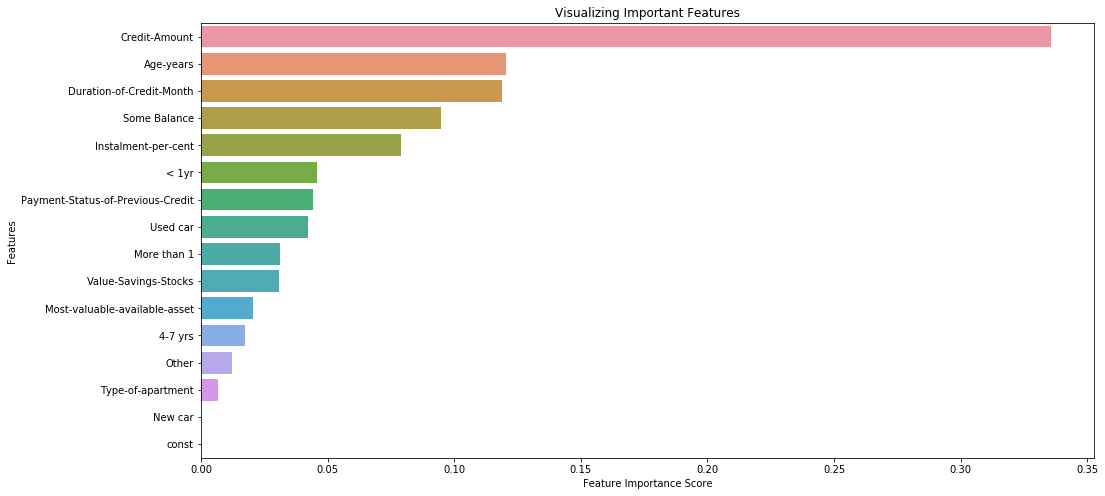

In [93]:
visualiza_features_importantes(feature_imp)

In [94]:
feature_selecionadas = []
for feature, importancia in feature_imp.iteritems():
  if importancia >0.03:
    print("{}:\t{}".format(feature, importancia))
    feature_selecionadas.append(feature)

Credit-Amount:	0.335758787548064
Age-years:	0.12029843879944485
Duration-of-Credit-Month:	0.11907165542219085
Some Balance:	0.094618935044467
Instalment-per-cent:	0.07880581412580423
< 1yr:	0.04598182535227042
Payment-Status-of-Previous-Credit:	0.04421325160100674
Used car:	0.042135767832631885
More than 1:	0.03139050491991669
Value-Savings-Stocks:	0.03090711253976559


**Feature Importance para o modelo de Arvore de Decisão na Validação Cruzada**

In [95]:
dataset1 = train[feature_selecionadas]
classes1 = train['Credito_negado']

In [96]:
tree_clf1 = DecisionTreeClassifier(random_state=48)

In [97]:
resul_tree1 = cross_val_predict(tree_clf1,dataset1, classes1, cv=80)

In [98]:
print(classification_report(classes1, resul_tree1))
print('\n')
print(confusion_matrix(classes1, resul_tree1))

              precision    recall  f1-score   support

           0       0.77      0.75      0.76       358
           1       0.41      0.45      0.43       142

    accuracy                           0.66       500
   macro avg       0.59      0.60      0.60       500
weighted avg       0.67      0.66      0.67       500



[[267  91]
 [ 78  64]]


In [99]:
score_tree1 = cross_val_score(tree_clf1,dataset1, classes1, cv=80)
score_tree1.mean()

0.6629166666666666

Após repetir o experimento, sobre a árvore de decisão, cheguei a conclusão de que esse tipo de modelo causa muito overfiting. A unica forma para corrigir é fazendo uma validação cruzada. 
O melhor modelo que não carregue overfiting, é o modelo de validação cruzada com feature importance. Porém ambos os resultados foram bastante similares. Agora vamos repetir os mesmos passos mas para o modelo de floresta aleatória. 

## Floresta Aleatória

In [100]:
rfc.feature_importances_

array([0.        , 0.13839252, 0.07659795, 0.23386402, 0.05144928,
       0.05663464, 0.06928985, 0.14792851, 0.03392699, 0.07611443,
       0.02703869, 0.01890381, 0.02846665, 0.0134529 , 0.00514131,
       0.02279845])

In [101]:
feature_imp = pd.Series(rfc.feature_importances_,index=X_train.columns).sort_values(ascending=False)
feature_imp

Credit-Amount                        0.233864
Age-years                            0.147929
Duration-of-Credit-Month             0.138393
Payment-Status-of-Previous-Credit    0.076598
Some Balance                         0.076114
Most-valuable-available-asset        0.069290
Instalment-per-cent                  0.056635
Value-Savings-Stocks                 0.051449
Type-of-apartment                    0.033927
< 1yr                                0.028467
More than 1                          0.027039
Used car                             0.022798
4-7 yrs                              0.018904
New car                              0.013453
Other                                0.005141
const                                0.000000
dtype: float64

In [102]:
def visualiza_features_importantes(features_lista):
    %matplotlib inline

    plt.figure(figsize=(16,8))
    sns.barplot(x=features_lista, y=features_lista.index)

    plt.xlabel('Feature Importance Score')
    plt.ylabel('Features')
    plt.title("Visualizing Important Features")
    plt.show()

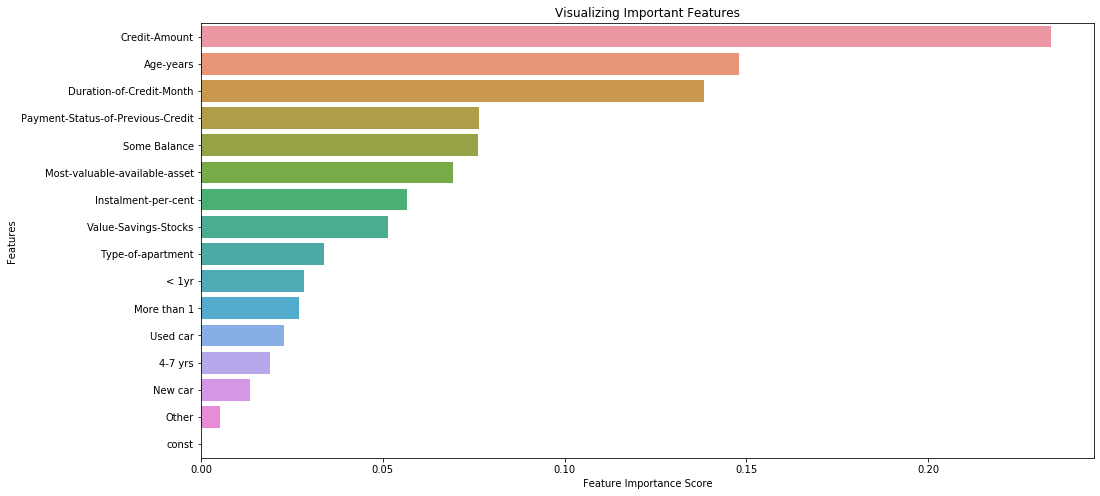

In [103]:
visualiza_features_importantes(feature_imp)

In [104]:
feature_selecionadas = []
for feature, importancia in feature_imp.iteritems():
  if importancia >0.03:
    print("{}:\t{}".format(feature, importancia))
    feature_selecionadas.append(feature)

Credit-Amount:	0.23386402098935857
Age-years:	0.14792850605294944
Duration-of-Credit-Month:	0.1383925168185337
Payment-Status-of-Previous-Credit:	0.07659794614729472
Some Balance:	0.076114427613394
Most-valuable-available-asset:	0.06928984906544124
Instalment-per-cent:	0.056634641408422594
Value-Savings-Stocks:	0.05144928028938877
Type-of-apartment:	0.03392698689766971


**Feature Importance para o modelo de Floresta Aleatória na Validação Cruzada**

In [105]:
dataset2 = train[feature_selecionadas]
classes2 = train['Credito_negado']

In [106]:
random_clf1 = RandomForestClassifier(random_state=48, n_estimators=100)

In [107]:
resul_random11 = cross_val_predict(random_clf1, dataset2, classes2, cv=15)

In [108]:
print(classification_report(classes2, resul_random11))
print('\n')
print(confusion_matrix(classes2, resul_random11))

              precision    recall  f1-score   support

           0       0.74      0.80      0.77       358
           1       0.38      0.31      0.34       142

    accuracy                           0.66       500
   macro avg       0.56      0.55      0.56       500
weighted avg       0.64      0.66      0.65       500



[[286  72]
 [ 98  44]]


In [109]:
resul_random11_score = cross_val_score(random_clf1, dataset2, classes2, cv=15)
resul_random11_score

array([0.73529412, 0.73529412, 0.73529412, 0.52941176, 0.64705882,
       0.64705882, 0.73529412, 0.75757576, 0.6969697 , 0.6969697 ,
       0.66666667, 0.6969697 , 0.81818182, 0.3125    , 0.46875   ])

In [110]:
resul_random11_score.mean()

0.6586192810457517

Após finalizarmos os modelos de Floresta Aleatória, percebemos uma pequena melhora após reduzirmos features menores do que 0,03.



**Validação Cruzada - Boosting, com feature Importance**

In [111]:
gbc.feature_importances_

array([0.        , 0.1227615 , 0.08179879, 0.34126229, 0.03304466,
       0.02918879, 0.04372308, 0.11422274, 0.01646293, 0.1423996 ,
       0.01211801, 0.00737447, 0.02525217, 0.01134363, 0.        ,
       0.01904736])

In [112]:
feature_imp = pd.Series(gbc.feature_importances_,index=X_train.columns).sort_values(ascending=False)
feature_imp

Credit-Amount                        0.341262
Some Balance                         0.142400
Duration-of-Credit-Month             0.122761
Age-years                            0.114223
Payment-Status-of-Previous-Credit    0.081799
Most-valuable-available-asset        0.043723
Value-Savings-Stocks                 0.033045
Instalment-per-cent                  0.029189
< 1yr                                0.025252
Used car                             0.019047
Type-of-apartment                    0.016463
More than 1                          0.012118
New car                              0.011344
4-7 yrs                              0.007374
Other                                0.000000
const                                0.000000
dtype: float64

In [113]:
def visualiza_features_importantes(features_lista):
    %matplotlib inline

    plt.figure(figsize=(16,8))
    sns.barplot(x=features_lista, y=features_lista.index)

    plt.xlabel('Feature Importance Score')
    plt.ylabel('Features')
    plt.title("Visualizing Important Features")
    plt.show()

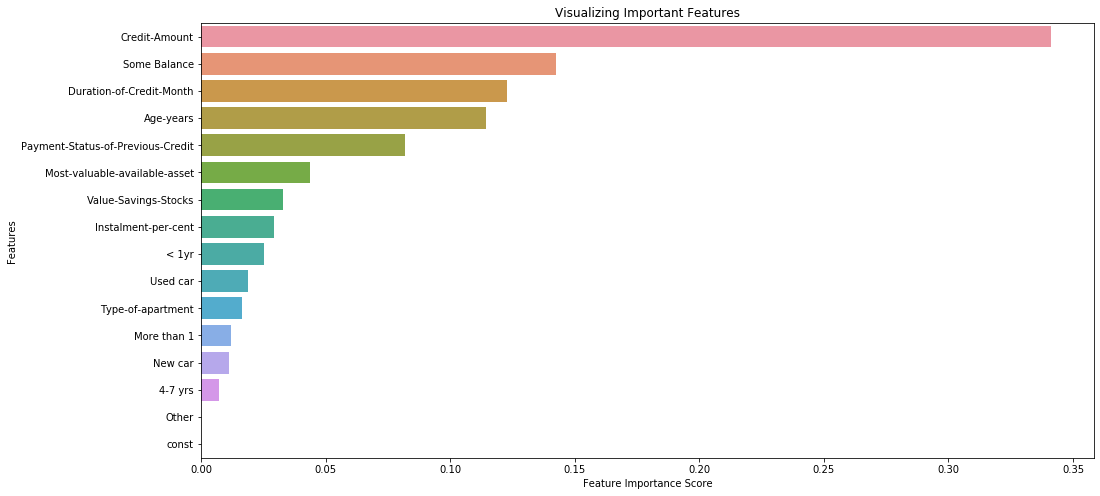

In [114]:
visualiza_features_importantes(feature_imp)

In [115]:
feature_selecionadas = []
for feature, importancia in feature_imp.iteritems():
  if importancia >0.03:
    print("{}:\t{}".format(feature, importancia))
    feature_selecionadas.append(feature)

Credit-Amount:	0.34126228610309944
Some Balance:	0.14239959798404592
Duration-of-Credit-Month:	0.12276149565307712
Age-years:	0.11422274221751023
Payment-Status-of-Previous-Credit:	0.08179879095313897
Most-valuable-available-asset:	0.04372308357054309
Value-Savings-Stocks:	0.03304465706508303


In [116]:
dataset3 = train[feature_selecionadas]
classes3 = train['Credito_negado']

In [117]:
gbc_clf1 = GradientBoostingClassifier(random_state=48)

In [118]:
resul_gbc1 = cross_val_predict(gbc_clf1,dataset3, classes3, cv=100)

In [119]:
print(classification_report(classes3, resul_gbc1))
print('\n')
print(confusion_matrix(classes3, resul_gbc1))

              precision    recall  f1-score   support

           0       0.78      0.89      0.83       358
           1       0.55      0.36      0.44       142

    accuracy                           0.74       500
   macro avg       0.67      0.62      0.63       500
weighted avg       0.71      0.74      0.72       500



[[317  41]
 [ 91  51]]


In [120]:
score_gbc1 = cross_val_score(gbc_clf1,dataset3, classes3, cv=100)
score_gbc1.mean()

0.7396666666666666

## Tunando os modelos que foram feitos validação cruzada - Floresta Aleatória

In [121]:
from sklearn.model_selection import GridSearchCV

#### Lista de possíveis valores de estimators ou quantidade de árvores da floresta.

In [122]:
valores_estimators = [10, 20, 30, 40, 50]

####Lista de possíveis valores para o critério de divisão

In [123]:
valores_criterion = ['gini','entropy']

#### Lista de possíveis valores para a profundidade máxima de cada árvore

In [124]:
valores_max_depth = [10, 20, 30, 40, 50]

#### Lista de possíveis valores para os parametros min_samples_split e min_samples_leaf.

In [125]:
valores_min_samples_split = [2, 5, 10, 15]
valores_min_samples_leaf = [1, 5, 10, 15]

#### Define um dicionário que recebe as listas de parâmetros e valores.

In [126]:
parametros_grid = dict(n_estimators=valores_estimators,
                       criterion=valores_criterion,
                       max_depth=valores_max_depth,
                       min_samples_split=valores_min_samples_split,
                       min_samples_leaf=valores_min_samples_leaf 
                      )

In [127]:
parametros_grid

{'n_estimators': [10, 20, 30, 40, 50],
 'criterion': ['gini', 'entropy'],
 'max_depth': [10, 20, 30, 40, 50],
 'min_samples_split': [2, 5, 10, 15],
 'min_samples_leaf': [1, 5, 10, 15]}

In [128]:
rf = RandomForestClassifier()

In [129]:
grid_rf = GridSearchCV(rf, parametros_grid, cv=5, scoring='accuracy')

In [130]:
grid_rf.fit(dataset, classes)

/home/felipe/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [131]:
grid_rf.cv_results_

{'mean_fit_time': array([0.03452802, 0.04683332, 0.06772408, 0.09192848, 0.11255636,
        0.02493649, 0.04573007, 0.06686773, 0.08932042, 0.10825915,
        0.02499194, 0.04593196, 0.06636233, 0.08817024, 0.10888615,
        0.02422752, 0.04648976, 0.06553149, 0.08504858, 0.10593405,
        0.02446604, 0.04443331, 0.06475172, 0.08529778, 0.10533624,
        0.02441578, 0.04461102, 0.06556807, 0.08459659, 0.10565944,
        0.02433147, 0.04509954, 0.06475029, 0.08549652, 0.10826044,
        0.02431345, 0.04514914, 0.06492505, 0.08557086, 0.10484767,
        0.02414832, 0.04410553, 0.0640049 , 0.08326344, 0.10371099,
        0.02429237, 0.04396901, 0.0643322 , 0.08446603, 0.10365014,
        0.02390113, 0.04380808, 0.06381078, 0.08441868, 0.10370131,
        0.02420821, 0.04451036, 0.06417098, 0.08825336, 0.10896211,
        0.02535706, 0.04511943, 0.06418257, 0.08611922, 0.11145625,
        0.02767973, 0.04894352, 0.07085586, 0.08930359, 0.11073551,
        0.02373934, 0.04351349,

In [132]:
grid_rf.best_params_

{'criterion': 'entropy',
 'max_depth': 30,
 'min_samples_leaf': 15,
 'min_samples_split': 10,
 'n_estimators': 10}

In [133]:
grid_rf.best_score_

0.752

In [134]:
rf_melhor = RandomForestClassifier(criterion='entropy', max_depth=30, min_samples_leaf=15, min_samples_split=10, n_estimators=10)

In [138]:
resul_random = cross_val_predict(grid_rf, dataset, classes, cv=5)

/home/felipe/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/home/felipe/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/home/felipe/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/home/felipe/anaconda3/lib/python3.7/site-packages/sklearn/model_selec

In [136]:
print(classification_report(classes, resul_random))
print('\n')
print(confusion_matrix(classes, resul_random))

              precision    recall  f1-score   support

           0       0.75      0.96      0.84       358
           1       0.61      0.18      0.27       142

    accuracy                           0.73       500
   macro avg       0.68      0.57      0.56       500
weighted avg       0.71      0.73      0.68       500



[[342  16]
 [117  25]]


In [137]:
resul_random_score = cross_val_score(rf_melhor, dataset, classes, cv=5)
resul_random_score.mean()

0.7340988098809881

## Printar todos os resultados e ver qual é o melhor modelo que será utilizado. 

In [ ]:
import matplotlib.pyplot as plt  # doctest: +SKIP
from sklearn import datasets, metrics, model_selection, svm
X, y = datasets.make_classification(random_state=48)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state=48)
clf = svm.SVC(random_state=0)
>>> clf.fit(X_train, y_train)
SVC(random_state=0)
>>> metrics.plot_roc_curve(clf, X_test, y_test)  # doctest: +SKIP
>>> plt.show()      

In [170]:
print('Modelo Logistico')
print(log_cv.score(dataset, classes))
print(classification_report(classes, logmodel1))
print(confusion_matrix(classes, logmodel1))
print('\n')

print('Floresta Aleatória')
print(resul_random1.mean())
print(classification_report(classes, resul_random))
print(confusion_matrix(classes, resul_random))
print('\n')

print('Modelo Árvore de Decisão')
print(score_tree.mean())
print(classification_report(classes, resul_tree))
print(confusion_matrix(classes, resul_tree))
print('\n')

print('Boosting Model')
print(score_gbc.mean())
print(classification_report(classes, resul_gbc))
print(confusion_matrix(classes, resul_gbc))
print('\n')

Modelo Logistico
0.78
              precision    recall  f1-score   support

           0       0.81      0.91      0.86       358
           1       0.67      0.44      0.53       142

    accuracy                           0.78       500
   macro avg       0.74      0.68      0.69       500
weighted avg       0.77      0.78      0.76       500

[[327  31]
 [ 79  63]]


Floresta Aleatória
0.7149101307189543
              precision    recall  f1-score   support

           0       0.74      0.91      0.82       358
           1       0.46      0.19      0.27       142

    accuracy                           0.71       500
   macro avg       0.60      0.55      0.54       500
weighted avg       0.66      0.71      0.66       500

[[326  32]
 [115  27]]


Modelo Árvore de Decisão
0.6539999999999999
              precision    recall  f1-score   support

           0       0.77      0.75      0.76       358
           1       0.40      0.42      0.41       142

    accuracy                

O modelo escolhido foi o logístico. Pois desde o começo se apresentou com pouco overfiting no formato treino/teste de 70/30. Após aplicarmos validação cruzada nos dados, os modelos Boosting Model e o logisitico apresentaram os melhores resultados tanto em score, como em precision, recall, f1-score e matriz de confusão. Por esse motivo foi escolhido o modelo logisitico. 

## Agora vamos pegar o modelo predito, sobre novos dados. 


In [171]:
res = pd.read_excel('4.customers-to-score.xlsx', sheet_name="Sheet1")
res



,Account-Balance,Duration-of-Credit-Month,Payment-Status-of-Previous-Credit,Purpose,Credit-Amount,Value-Savings-Stocks,Length-of-current-employment,Instalment-per-cent,Guarantors,Duration-in-Current-address,Most-valuable-available-asset,Age-years,Concurrent-Credits,Type-of-apartment,No-of-Credits-at-this-Bank,Occupation,No-of-dependents,Telephone,Foreign-Worker
0,No Account,9,No Problems (in this bank),Home Related,2799,None,< 1yr,2,None,2,1,36,Other Banks/Depts,1,More than 1,1,2,1,1
1,No Account,12,No Problems (in this bank),Home Related,2122,None,< 1yr,3,None,2,1,39,Other Banks/Depts,1,More than 1,1,2,1,2
2,No Account,24,Paid Up,Home Related,3758,£100-£1000,< 1yr,1,None,4,4,23,Other Banks/Depts,1,1,1,1,1,1
3,No Account,11,No Problems (in this bank),Home Related,3905,None,< 1yr,2,None,2,1,36,Other Banks/Depts,1,More than 1,1,2,1,1
4,No Account,6,No Problems (in this bank),Home Related,1957,None,1-4 yrs,1,None,4,3,31,Other Banks/Depts,2,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,No Account,18,No Problems (in this bank),Home Related,3966,None,4-7 yrs,1,None,4,1,33,Other Banks/Depts,1,More than 1,1,1,2,1
496,No Account,12,Some Problems,Home Related,6199,None,< 1yr,4,None,2,2,28,Other Banks/Depts,1,More than 1,1,1,2,1
497,No Account,24,Paid Up,Home Related,1987,None,< 1yr,2,None,4,1,21,Other Banks/Depts,1,1,1,2,1,1
498,No Account,24,Paid Up,Home Related,2303,None,4-7 yrs,4,Yes,1,1,45,Other Banks/Depts,2,1,1,1,1,1


In [172]:
res = pd.DataFrame()
res['Credito_negado'] = logmodel1
res.to_csv('submission4.csv',index=False)


In [173]:
a = pd.read_csv('submission4.csv')
a

,Credito_negado
0,0
1,0
2,0
3,0
4,0
...,...
495,0
496,0
497,1
498,0


In [174]:
a['Credito_negado'].value_counts()

0    406
1     94
Name: Credito_negado, dtype: int64

No nosso modelo 406 pessoas estavam aptos a receber o crédito, enquanto 94 tiveram seus pedidos negados. 